In [24]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as wb
from datetime import datetime
#considerem a sigla "rd" como retorno diário

In [44]:
IBOV = wb.DataReader('^BVSP', data_source='yahoo', start='2009-1-1')#Cotação diária do Ibovesva desde 2009

In [45]:
import quandl 
"""Um site que organiza dados econômicos disponibiliza gratuitamente algumas bases de dados
Para baixar a biblioteca olhe na documentação https://docs.quandl.com/
O comando para baixar esses dados usando a biblioteca deles é quandl.get
"""
CDI_diario= quandl.get("BCB/12", authtoken="wHnVchHSPwZYMsXTPAUm",start_date="2009-1-1")# % diária
SELIC_diaria= quandl.get("BCB/11", authtoken="wHnVchHSPwZYMsXTPAUm",start_date="2009-1-1")# %diária
dolar_compra=quandl.get("BCB/10813", authtoken="wHnVchHSPwZYMsXTPAUm",start_date="2009-1-1")# Preço diário

In [46]:
IBOV.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,40265.0,37550.0,37550.0,40244.0,1055200.0,40244.0
2009-01-05,41889.0,39526.0,40243.0,41519.0,1909200.0,41519.0
2009-01-06,42363.0,41520.0,41520.0,42312.0,1791000.0,42312.0
2009-01-07,42308.0,40563.0,42308.0,40820.0,1383600.0,40820.0
2009-01-08,41991.0,40251.0,40819.0,41991.0,1556000.0,41991.0


In [47]:
CDI_diario.set_axis(['rd_CDI'],axis='columns',inplace=True)
CDI_diario.head()

,rd_CDI
Date,
2009-01-02,0.050683
2009-01-05,0.050578
2009-01-06,0.050613
2009-01-07,0.050648
2009-01-08,0.050613


In [48]:
SELIC_diaria.set_axis(['rd_SELIC'],axis='columns',inplace=True)
SELIC_diaria.head()

,rd_SELIC
Date,
2009-01-02,0.050858
2009-01-05,0.050823
2009-01-06,0.050823
2009-01-07,0.050823
2009-01-08,0.050823


In [49]:
dolar_compra.set_axis(['rd_dolar'],axis='columns',inplace=True)
dolar_compra.head()

,rd_dolar
Date,
2009-01-02,2.3290
2009-01-05,2.2772
2009-01-06,2.1881
2009-01-07,2.2166
2009-01-08,2.2675


Para o calculo do portfolio de máximo retorno e minimo risco, precisamos usar o retorno diário em %
devemos, transfomar o preço diário do dólar e preço ajustado do ibovespa,usando a seguinte equação:


# Retorno diário = ((preço atual)/(preço  do dia anterior))-1

# $$
Retorno diário = \frac{Preço atual}{Preço do dia anterior} - 1
$$

In [50]:
IBOVESPA=pd.DataFrame()

In [51]:
# Criando um outro DataFrame com o retorno diário
IBOVESPA['rd_ibov']=(IBOV['Adj Close']/IBOV['Adj Close'].shift(1))-1 
#inserindo uma coluna e calculando o retorno diário
dolar_compra['rd_dolar']=(dolar_compra['rd_dolar']/dolar_compra['rd_dolar'].shift(1))-1 #


Por questões matemáticas utilizaremos o conceito de log retorno para os cálculos de correlação e covariância dos ativos.

In [52]:
ativos=pd.DataFrame()

In [53]:
#Comando para juntar as bases de dados usando a data como chave
ativos=dolar_compra.merge(IBOVESPA,on='Date').merge(SELIC_diaria,on='Date')
#comando para excluir onde tem-se elementos vazio, no nosso caso temos só as 2 primeiras linhas
ativos.dropna(inplace=True)
ativos.head()

,rd_dolar,rd_ibov,rd_SELIC
Date,,,
2009-01-05,-0.022241,0.031682,0.050823
2009-01-06,-0.039127,0.019100,0.050823
2009-01-07,0.013025,-0.035262,0.050823
2009-01-08,0.022963,0.028687,0.050823
2009-01-09,0.008115,-0.009716,0.050823


In [54]:
ativos.corr()#Calculanod a correlação entre os ativos

,rd_dolar,rd_ibov,rd_SELIC
rd_dolar,1.000000,-0.365672,-0.004857
rd_ibov,-0.365672,1.000000,-0.001864
rd_SELIC,-0.004857,-0.001864,1.000000


In [55]:
ativos.mean() # Calculando a média do retorno diário

rd_dolar    0.000267
rd_ibov     0.000460
rd_SELIC    0.038239
dtype: float64

In [56]:
IBOVESPA.head()
#Agora falta fazer as contas da teoria do Portfolio, passaremos a como fazer uma gráfico com 2 indices

,rd_ibov
Date,
2009-01-02,NaN
2009-01-05,0.031682
2009-01-06,0.019100
2009-01-07,-0.035262
2009-01-08,0.028687


In [57]:
IBOV.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,40265.0,37550.0,37550.0,40244.0,1055200.0,40244.0
2009-01-05,41889.0,39526.0,40243.0,41519.0,1909200.0,41519.0
2009-01-06,42363.0,41520.0,41520.0,42312.0,1791000.0,42312.0
2009-01-07,42308.0,40563.0,42308.0,40820.0,1383600.0,40820.0
2009-01-08,41991.0,40251.0,40819.0,41991.0,1556000.0,41991.0


In [61]:
IBOV['data']=IBOV.index
IBOV['data'] = pd.to_datetime(IBOV.data)

In [62]:
IBOV['data'] = IBOV['data'].dt.strftime('%d/%m/%Y')#colocando as data no padrão brasileiro

In [63]:
IBOV.rename_axis("Date").head()

,High,Low,Open,Close,Volume,Adj Close,data
Date,,,,,,,
2009-01-02,40265.0,37550.0,37550.0,40244.0,1055200.0,40244.0,02/01/2009
2009-01-05,41889.0,39526.0,40243.0,41519.0,1909200.0,41519.0,05/01/2009
2009-01-06,42363.0,41520.0,41520.0,42312.0,1791000.0,42312.0,06/01/2009
2009-01-07,42308.0,40563.0,42308.0,40820.0,1383600.0,40820.0,07/01/2009
2009-01-08,41991.0,40251.0,40819.0,41991.0,1556000.0,41991.0,08/01/2009


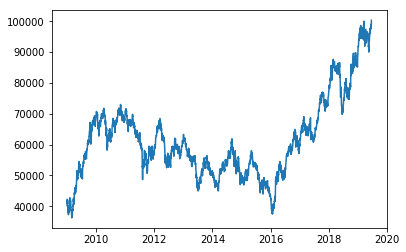

In [64]:
#Gráfico do IBOVESPA desde 2009
fig, ax = plt.subplots()
ax.plot(IBOV['Adj Close'])
plt.show()

In [65]:
selic=quandl.get("BCB/1178", authtoken="wHnVchHSPwZYMsXTPAUm", start_date="2009-01-02")
selic.head()

,Value
Date,
2009-01-02,13.67
2009-01-05,13.66
2009-01-06,13.66
2009-01-07,13.66
2009-01-08,13.66


In [66]:
ibov_selic= pd.merge(selic,IBOV,on="Date")

In [67]:
ibov_selic.head()

,Value,High,Low,Open,Close,Volume,Adj Close,data
Date,,,,,,,,
2009-01-02,13.67,40265.0,37550.0,37550.0,40244.0,1055200.0,40244.0,02/01/2009
2009-01-05,13.66,41889.0,39526.0,40243.0,41519.0,1909200.0,41519.0,05/01/2009
2009-01-06,13.66,42363.0,41520.0,41520.0,42312.0,1791000.0,42312.0,06/01/2009
2009-01-07,13.66,42308.0,40563.0,42308.0,40820.0,1383600.0,40820.0,07/01/2009
2009-01-08,13.66,41991.0,40251.0,40819.0,41991.0,1556000.0,41991.0,08/01/2009


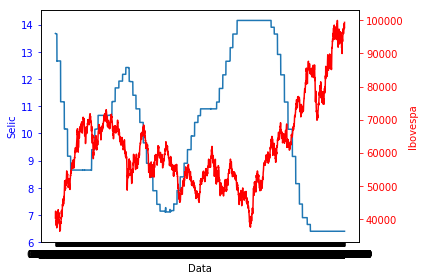

In [69]:
fig, ax1 = plt.subplots()
t =  np.arange(0.0, 2.0, 0.01)
x=ibov_selic['data']
s1 = np.exp(t)
ax1.plot(x,ibov_selic['Value'])
ax1.set_xlabel('Data')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Selic', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = ibov_selic['Adj Close']
ax2.plot(x,s2,color='r')
ax2.set_ylabel('Ibovespa', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()